In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression



***READING DATASET***

In [2]:
data = pd.read_csv("StressLevelDataset.csv")

***CONVERTING INTO DATAFRAME***

In [3]:
df = pd.DataFrame(data)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [18]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [22]:
print(df.columns)


Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


***USING LINEAR REGRESSION MODEL***

In [24]:
X = df.drop('stress_level', axis=1) 
y = df['stress_level']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [26]:
print(X_train.shape, y_train.shape)


(770, 20) (770,)


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 0.14242872088383052
RMSE: 0.3773972984585747


In [84]:
y_pred

array([ 1.93325249e+00,  1.02507452e-02,  1.00802251e+00,  8.01654437e-01,
        1.24260197e-01,  8.60942309e-01,  1.78416030e+00, -1.11374121e-01,
        1.10412624e+00,  6.92379328e-01, -1.83044452e-01, -1.23756325e-01,
        1.11369729e-01,  2.08797718e+00,  1.07639554e+00, -3.56013383e-02,
        1.57043451e-03,  2.19428607e+00,  9.75931683e-01,  1.15625867e-01,
        1.15661131e+00,  9.29540728e-01, -5.45128220e-02,  1.00965638e+00,
        8.20773597e-01,  2.01250033e+00,  9.07460716e-01,  1.16307857e-01,
        3.44859819e-04, -1.63555091e-02,  1.25544080e+00,  1.85973649e+00,
        2.00255799e+00,  1.79714745e-02,  1.25842130e-02,  9.68939542e-01,
        1.41267344e+00,  1.07214965e+00,  1.93267550e+00,  2.05655237e+00,
        2.01351393e+00,  8.64055439e-02,  1.06543298e+00,  1.19070335e+00,
        1.96092916e+00, -5.97412885e-02,  2.03091892e+00,  1.52213989e+00,
       -3.85473354e-02, -1.40988732e-01,  9.83357776e-01,  1.01004106e-01,
        1.51610980e-01,  

In [86]:
y_test

328    2
688    0
413    1
788    1
244    0
      ..
319    1
979    2
919    2
989    0
724    1
Name: stress_level, Length: 220, dtype: int64

In [36]:
target_range = 2  
percentage_error = (rmse / target_range) * 100

print("Percentage Error:", percentage_error, "%")


Percentage Error: 18.869864922928738 %


In [38]:
y_pred_rounded = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)

print("Accuracy:", accuracy)


Accuracy: 0.8909090909090909


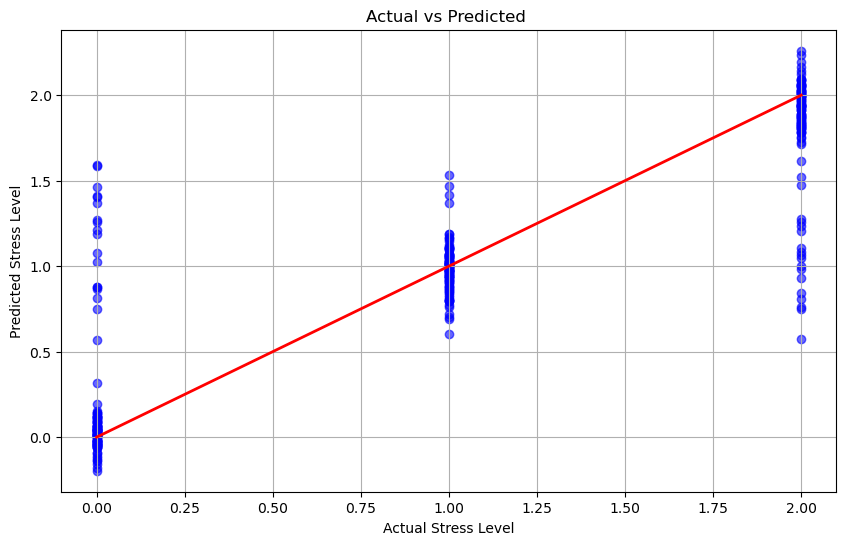

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # line of perfect prediction
plt.title('Actual vs Predicted ')
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level')
plt.grid(True)
plt.show()

***USING RANDOM FOREST REGRESSION MODEL***

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [43]:
y_pred_rf = rf_model.predict(X_test)


In [46]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.12548212121212118
RMSE: 0.3542345567729399


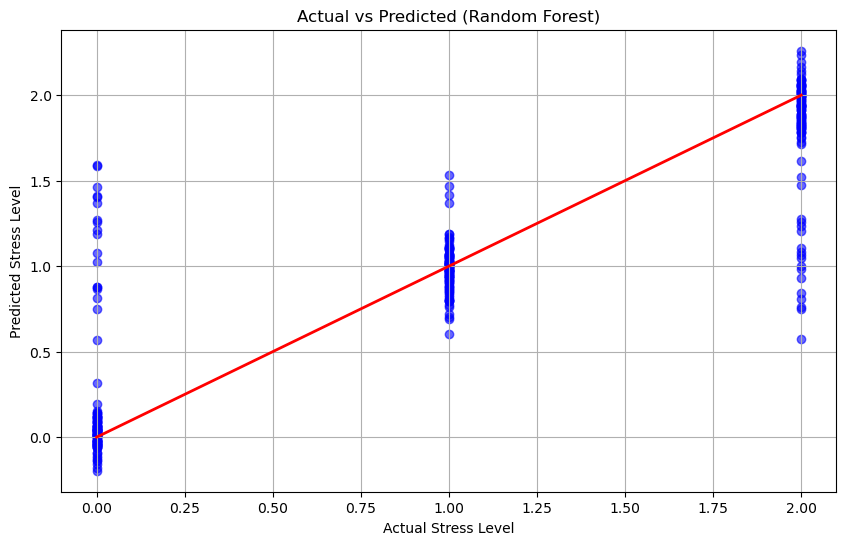

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # line of perfect prediction
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level')
plt.grid(True)
plt.show()

***USING LOGISTIC REGRESSION MODEL***

In [51]:

from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Accuracy: 0.8818181818181818


C:\Users\CCEE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***USING RANDOM FOREST CLASSIFICATION MODEL***

In [88]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Accuracy: 0.8727272727272727


In [55]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [73]:
def predict_stress_level(input_features):
    """
    Predicts the stress level based on input features using the trained model.
    
    :param input_features: A dictionary or list of feature values.
    :return: Predicted stress level.
    """
    # Convert input features to DataFrame for compatibility with the model
    input_df = pd.DataFrame([input_features])
    
    # Ensure the input columns match the training data columns
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    
    # Predict stress level using Logistic Regression
    predicted_stress_lr = clf_lr.predict(input_df)
    
    # Predict stress level using Random Forest
    predicted_stress_rf = clf_rf.predict(input_df)
    
    # You can return both predictions for comparison
    return predicted_stress_lr[0], predicted_stress_rf[0]

def get_user_input():
    input_data = {}
    
    input_data['anxiety_level'] = int(input("Enter anxiety level (0-21): "))
    input_data['self_esteem'] = int(input("Enter self-esteem level (0-30): "))
    input_data['mental_health_history'] = int(input("Enter mental health history (0-1): "))
    input_data['depression'] = int(input("Enter depression level (0-27): "))
    input_data['headache'] = int(input("Enter headache level (0-5): "))
    input_data['blood_pressure'] = int(input("Enter blood pressure level (0-3): "))
    input_data['sleep_quality'] = int(input("Enter sleep quality level (0-5): "))
    input_data['breathing_problem'] = int(input("Enter breathing problem level (0-5): "))
    input_data['noise_level'] = int(input("Enter noise level (0-5): "))
    input_data['living_conditions'] = int(input("Enter living conditions (0-5): "))
    input_data['safety'] = int(input("Enter safety level (0-5): "))
    input_data['basic_needs'] = int(input("Enter basic needs level (0-5): "))
    input_data['academic_performance'] = int(input("Enter academic performance level (0-5): "))
    input_data['study_load'] = int(input("Enter study load level (0-5): "))
    input_data['teacher_student_relationship'] = int(input("Enter teacher-student relationship level (0-5): "))
    input_data['future_career_concerns'] = int(input("Enter future career concerns level (0-5): "))
    input_data['social_support'] = int(input("Enter social support level (0-5): "))
    input_data['peer_pressure'] = int(input("Enter peer pressure level (0-5): "))
    input_data['extracurricular_activities'] = int(input("Enter extracurricular activities level (0-5): "))
    input_data['bullying'] = int(input("Enter bullying level (0-3): "))
    
    return input_data

# Get user input
input_data = get_user_input()

predicted_lr, predicted_rf = predict_stress_level(input_data)

print(f"Predicted Stress Level (Logistic Regression): {predicted_lr}")
print(f"Predicted Stress Level (Random Forest): {predicted_rf}")



Enter anxiety level (0-21):  20
Enter self-esteem level (0-30):  29
Enter mental health history (0-1):  1
Enter depression level (0-27):  25
Enter headache level (0-5):  0
Enter blood pressure level (0-3):  3
Enter sleep quality level (0-5):  4
Enter breathing problem level (0-5):  1
Enter noise level (0-5):  3
Enter living conditions (0-5):  4
Enter safety level (0-5):  5
Enter basic needs level (0-5):  2
Enter academic performance level (0-5):  3
Enter study load level (0-5):  4
Enter teacher-student relationship level (0-5):  0
Enter future career concerns level (0-5):  1
Enter social support level (0-5):  0
Enter peer pressure level (0-5):  5
Enter extracurricular activities level (0-5):  1
Enter bullying level (0-3):  0


Predicted Stress Level (Logistic Regression): 1
Predicted Stress Level (Random Forest): 0
